In [3]:
import requests
from requests import Response
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
response = requests.get(url)
print(response.text)

<!DOCTYPE html>
<html lang="zh-TW" class="no-js">
<head>
    <meta charset="utf-8" />
    <title>臺灣銀行牌告匯率</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="description" content="臺灣銀行匯率利率黃金牌價查詢">
    <meta name="keywords" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">
    <meta name="format-detection" content="telephone=no">
    <meta property="og:image" content="https://www.bot.com.tw/assets/images/bot-og-image_480x480.png">
        <meta name="robots" content="index,follow" />

    <link rel="icon" type="image/x-icon" href="/favicon.ico">
    <link rel="stylesheet" href="/Content/css/font-awesome.min.css">






    <link rel="stylesheet" href="/Content/css/jquery-ui.min.css">
    <link rel="stylesheet" href="/Content/main-3.8.0.css">
    <style nonce="QFFuoNvqCngc/eq8TQG6XapzWfovoqXcnLRQRQIYlGQ=">
    h1.hero__header { font-size:1.5625rem }
    
    
    .bank {display:none}
    </style>

    <nos

In [4]:
from bs4 import BeautifulSoup
from pprint import pprint
soup = BeautifulSoup(response.text, 'html.parser')

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table', {'title': '牌告匯率'})

# 取得所有幣別和現金匯率資料
currency_rows = rate_table.tbody.find_all('tr') 

rates:list[dict] = []

for row in currency_rows:
    currency_dict = {}
    # 取行中的幣別資料
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip()
    currency_dict["幣別"] = currency

    # 取得即期買入匯率
    currency_get = row.find("td", attrs={"data-table": "本行現金買入"}).text.strip()
    currency_dict["現金買入"] = currency_get

    # 取得即期賣出匯率
    currency_send = row.find("td", attrs={"data-table": "本行現金賣出"}).text.strip()
    currency_dict["現金賣出"] = currency_send

    #print(f"幣別: {currency}, 現金買入: {currency_get}, 現金賣出: {currency_send}")
    #print("-" * 60)
    rates.append(currency_dict)

pprint(rates)

[{'幣別': '美金 (USD)', '現金買入': '32.345', '現金賣出': '33.015'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.058', '現金賣出': '4.262'},
 {'幣別': '英鎊 (GBP)', '現金買入': '40.23', '現金賣出': '42.35'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.49', '現金賣出': '21.27'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.57', '現金賣出': '23.48'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '23.92', '現金賣出': '24.83'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '35.66', '現金賣出': '36.86'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2101', '現金賣出': '0.2229'},
 {'幣別': '南非幣 (ZAR)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '瑞典幣 (SEK)', '現金買入': '-', '現金賣出': '-'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.36', '現金賣出': '19.21'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8474', '現金賣出': '1.0374'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.5', '現金賣出': '0.632'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '33.48', '現金賣出': '34.82'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.0211', '現金賣出': '0.025'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.387', '現金賣出': '7.912'},


In [8]:
def filter_func(item:dict)->bool:
    if item["現金買入"] == "-":
        return False
    else:
        return True
    

filtered_rates = list(filter(filter_func,rates))
filtered_rates

[{'幣別': '美金 (USD)', '現金買入': '32.345', '現金賣出': '33.015'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.058', '現金賣出': '4.262'},
 {'幣別': '英鎊 (GBP)', '現金買入': '40.23', '現金賣出': '42.35'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.49', '現金賣出': '21.27'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.57', '現金賣出': '23.48'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '23.92', '現金賣出': '24.83'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '35.66', '現金賣出': '36.86'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2101', '現金賣出': '0.2229'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.36', '現金賣出': '19.21'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8474', '現金賣出': '1.0374'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.5', '現金賣出': '0.632'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '33.48', '現金賣出': '34.82'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.0211', '現金賣出': '0.025'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.387', '現金賣出': '7.912'},
 {'幣別': '人民幣 (CNY)', '現金買入': '4.421', '現金賣出': '4.583'}]

In [11]:
def map_func(item:dict)->dict:
    item["現金買入"] = float(item["現金買入"])
    item["現金賣出"] = float(item["現金賣出"])
    return item

cleared_list= list(map(map_func,filtered_rates))
cleared_list

[{'幣別': '美金 (USD)', '現金買入': 32.345, '現金賣出': 33.015},
 {'幣別': '港幣 (HKD)', '現金買入': 4.058, '現金賣出': 4.262},
 {'幣別': '英鎊 (GBP)', '現金買入': 40.23, '現金賣出': 42.35},
 {'幣別': '澳幣 (AUD)', '現金買入': 20.49, '現金賣出': 21.27},
 {'幣別': '加拿大幣 (CAD)', '現金買入': 22.57, '現金賣出': 23.48},
 {'幣別': '新加坡幣 (SGD)', '現金買入': 23.92, '現金賣出': 24.83},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': 35.66, '現金賣出': 36.86},
 {'幣別': '日圓 (JPY)', '現金買入': 0.2101, '現金賣出': 0.2229},
 {'幣別': '紐元 (NZD)', '現金買入': 18.36, '現金賣出': 19.21},
 {'幣別': '泰幣 (THB)', '現金買入': 0.8474, '現金賣出': 1.0374},
 {'幣別': '菲國比索 (PHP)', '現金買入': 0.5, '現金賣出': 0.632},
 {'幣別': '印尼幣 (IDR)', '現金買入': 0.00168, '現金賣出': 0.00238},
 {'幣別': '歐元 (EUR)', '現金買入': 33.48, '現金賣出': 34.82},
 {'幣別': '韓元 (KRW)', '現金買入': 0.0211, '現金賣出': 0.025},
 {'幣別': '越南盾 (VND)', '現金買入': 0.00104, '現金賣出': 0.00145},
 {'幣別': '馬來幣 (MYR)', '現金買入': 6.387, '現金賣出': 7.912},
 {'幣別': '人民幣 (CNY)', '現金買入': 4.421, '現金賣出': 4.583}]

In [9]:
import pandas as pd
df = pd.DataFrame(rates)
df.T # 轉置表格
df # 顯示表格

,幣別,現金買入,現金賣出
0,美金 (USD),32.345,33.015
1,港幣 (HKD),4.058,4.262
2,英鎊 (GBP),40.23,42.35
3,澳幣 (AUD),20.49,21.27
4,加拿大幣 (CAD),22.57,23.48
5,新加坡幣 (SGD),23.92,24.83
6,瑞士法郎 (CHF),35.66,36.86
7,日圓 (JPY),0.2101,0.2229
8,南非幣 (ZAR),-,-
9,瑞典幣 (SEK),-,-


In [12]:
import pandas as pd
df = pd.DataFrame(cleared_list)
df # 顯示表格

,幣別,現金買入,現金賣出
0,美金 (USD),32.34500,33.01500
1,港幣 (HKD),4.05800,4.26200
2,英鎊 (GBP),40.23000,42.35000
3,澳幣 (AUD),20.49000,21.27000
4,加拿大幣 (CAD),22.57000,23.48000
5,新加坡幣 (SGD),23.92000,24.83000
6,瑞士法郎 (CHF),35.66000,36.86000
7,日圓 (JPY),0.21010,0.22290
8,紐元 (NZD),18.36000,19.21000
9,泰幣 (THB),0.84740,1.03740


In [13]:

import pandas as pd
df = pd.DataFrame(cleared_list)
df = df.sort_values(by="現金買入",ascending=False)
df.head()

,幣別,現金買入,現金賣出
2,英鎊 (GBP),40.230,42.350
6,瑞士法郎 (CHF),35.660,36.860
12,歐元 (EUR),33.480,34.820
0,美金 (USD),32.345,33.015
5,新加坡幣 (SGD),23.920,24.830


In [14]:
df.tail()

,幣別,現金買入,現金賣出
10,菲國比索 (PHP),0.50000,0.63200
7,日圓 (JPY),0.21010,0.22290
13,韓元 (KRW),0.02110,0.02500
11,印尼幣 (IDR),0.00168,0.00238
14,越南盾 (VND),0.00104,0.00145


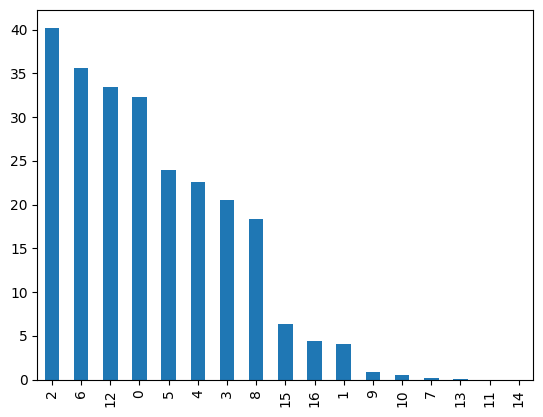

In [15]:
import matplotlib.pyplot as plt
df['現金買入'].plot(kind='bar')
plt.show()

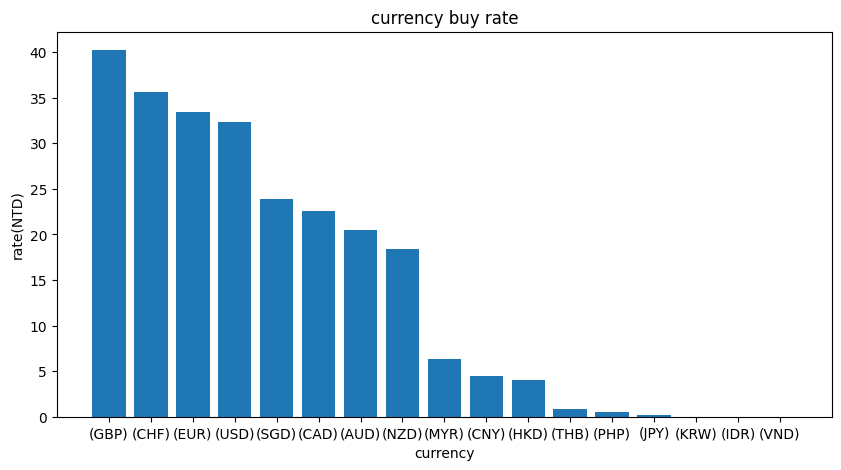

In [17]:
import matplotlib.pyplot as plt
# 1.製作figure
fig = plt.figure(figsize=(10, 5))
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.bar(df['幣別'].apply(lambda x: x.split()[-1]),df['現金買入'])
ax_1.set_title('currency buy rate')
ax_1.set_xlabel('currency')
ax_1.set_ylabel('rate(NTD)')
plt.show()